In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Germany/GER_wuerttemberg_culex_2010_2022.csv')
columns = ['x', 'y', 'dt_placement',
           'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/germany_wuerttemberg_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/germany_wuerttemberg_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN class regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Germany/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, [-1,   1.,  3.,  8.,  11., 16., 23., 37., 78., 206., np.inf], dropna=True)

Bounds: [ -1.   1.   3.   8.  11.  16.  23.  37.  78. 206.  inf]


In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 100, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 6.07089 | Val Loss: 4.83779 | Train Acc: 1.481| Val Acc: 1.271
Epoch 002: | Train Loss: 4.74781 | Val Loss: 3.72672 | Train Acc: 1.414| Val Acc: 1.279
Epoch 003: | Train Loss: 4.16813 | Val Loss: 3.23215 | Train Acc: 1.347| Val Acc: 1.125
Epoch 004: | Train Loss: 3.79110 | Val Loss: 2.97965 | Train Acc: 1.270| Val Acc: 1.046
Epoch 005: | Train Loss: 3.55603 | Val Loss: 2.86643 | Train Acc: 1.226| Val Acc: 1.017
Epoch 006: | Train Loss: 3.44798 | Val Loss: 2.81615 | Train Acc: 1.198| Val Acc: 1.021
Epoch 007: | Train Loss: 3.32004 | Val Loss: 2.79251 | Train Acc: 1.166| Val Acc: 0.994
Epoch 008: | Train Loss: 3.21305 | Val Loss: 2.77004 | Train Acc: 1.148| Val Acc: 0.991
Epoch 009: | Train Loss: 3.08250 | Val Loss: 2.73603 | Train Acc: 1.120| Val Acc: 0.996
Epoch 010: | Train Loss: 2.98868 | Val Loss: 2.71387 | Train Acc: 1.111| Val Acc: 0.991
Epoch 011: | Train Loss: 2.90342 | Val Loss: 2.72209 | Train Acc: 1.086| Val Acc: 0.998
Epoch 012: | Train Loss: 2.74467

Epoch 095: | Train Loss: 1.18959 | Val Loss: 2.32249 | Train Acc: 0.663| Val Acc: 0.886
Epoch 096: | Train Loss: 1.14548 | Val Loss: 2.35606 | Train Acc: 0.654| Val Acc: 0.890
Epoch 097: | Train Loss: 1.17920 | Val Loss: 2.37834 | Train Acc: 0.671| Val Acc: 0.899
Epoch 098: | Train Loss: 1.11843 | Val Loss: 2.35603 | Train Acc: 0.653| Val Acc: 0.886
Epoch 099: | Train Loss: 1.14863 | Val Loss: 2.30607 | Train Acc: 0.661| Val Acc: 0.867
Epoch 100: | Train Loss: 1.13467 | Val Loss: 2.41293 | Train Acc: 0.656| Val Acc: 0.909


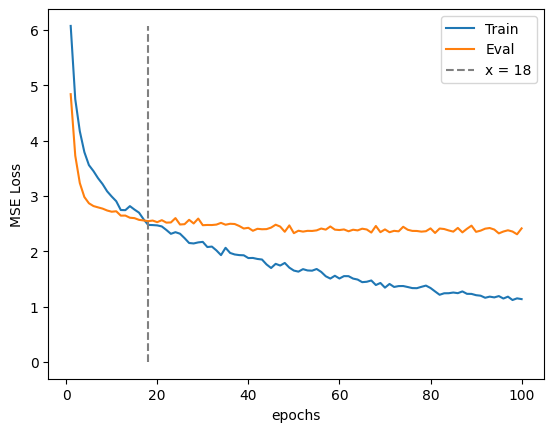

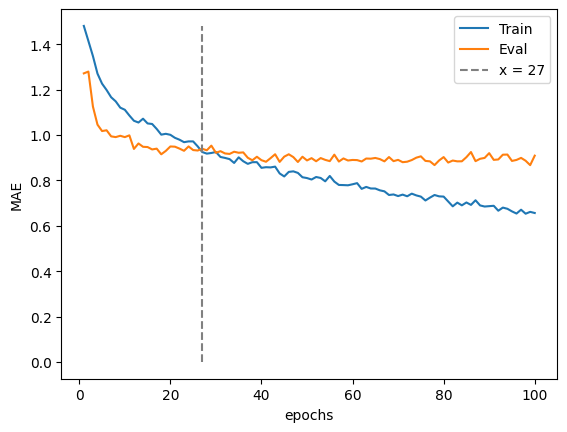

MAE on train set:  0.45825325645953446
min prediction: 0
max prediction: 9

MAE on test set:  0.9078138718173837
Error <= 3: 94.56 %
min prediction: 0
max prediction: 9


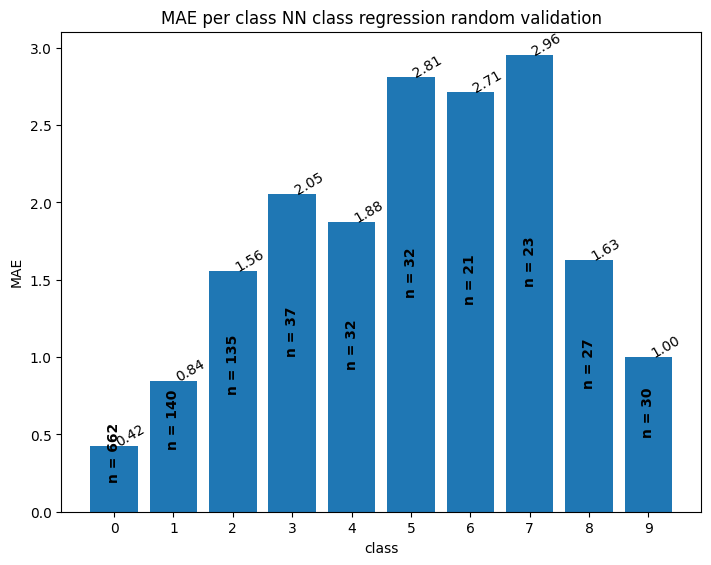

-----------|class error-MAE| difference-----------
mean: 0.9330218250704589
std: 0.6545433043823685
coefficient of variation (std/mean): 0.7015305395808286

----------normalized difference-------------
mean: 0.47687782170267906
std: 0.3345443555732106


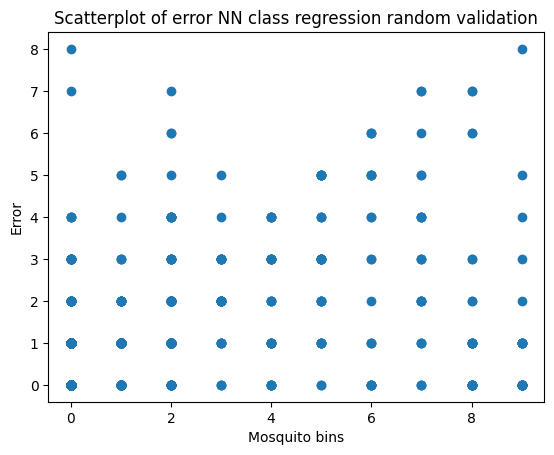

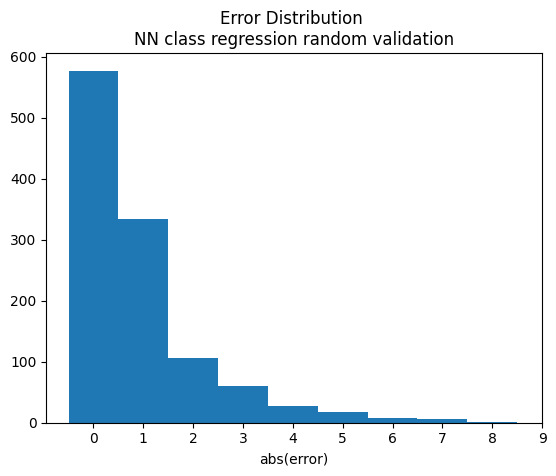

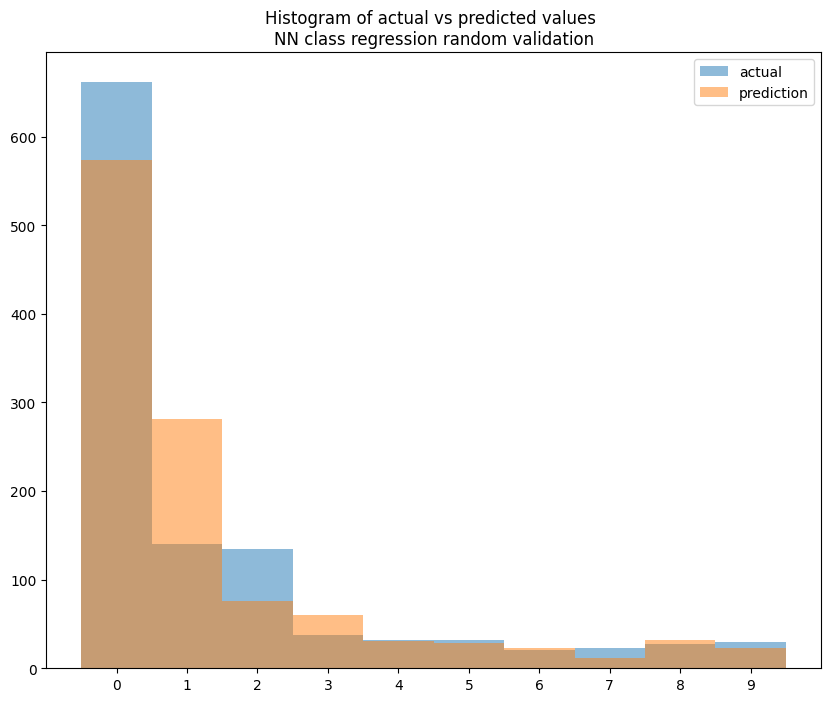

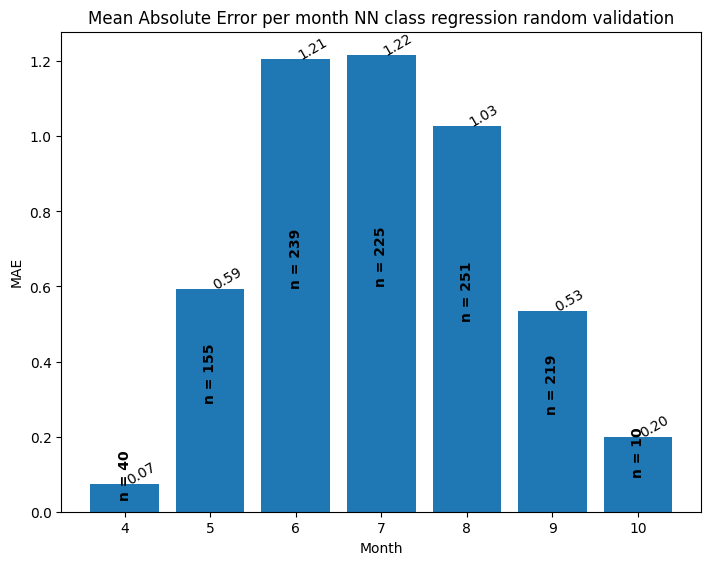

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 5.87127 | Val Loss: 5.46694 | Train Acc: 1.472| Val Acc: 1.471
Epoch 002: | Train Loss: 4.53041 | Val Loss: 4.11112 | Train Acc: 1.394| Val Acc: 1.394
Epoch 003: | Train Loss: 4.01944 | Val Loss: 3.36829 | Train Acc: 1.316| Val Acc: 1.243
Epoch 004: | Train Loss: 3.72767 | Val Loss: 3.11140 | Train Acc: 1.254| Val Acc: 1.164
Epoch 005: | Train Loss: 3.47933 | Val Loss: 2.90525 | Train Acc: 1.200| Val Acc: 1.088
Epoch 006: | Train Loss: 3.36870 | Val Loss: 2.83522 | Train Acc: 1.185| Val Acc: 1.122
Epoch 007: | Train Loss: 3.12822 | Val Loss: 2.81682 | Train Acc: 1.140| Val Acc: 1.124
Epoch 008: | Train Loss: 3.13969 | Val Loss: 2.75215 | Train Acc: 1.128| Val Acc: 1.113
Epoch 009: | Train Loss: 3.00188 | Val Loss: 2.70390 | Train Acc: 1.099| Val Acc: 1.069
Epoch 010: | Train Loss: 3.01619 | Val Loss: 2.65703 | Train Acc: 1.125| Val Acc: 1.058
Epoch 011: | Train Loss: 2.97904 | Val Loss: 2.71488 | Train Acc: 1.100| Val Acc: 1.087
Epoch 012: | Train Loss: 2.85579

Epoch 095: | Train Loss: 1.18206 | Val Loss: 2.19727 | Train Acc: 0.683| Val Acc: 0.949
Epoch 096: | Train Loss: 1.16414 | Val Loss: 2.20042 | Train Acc: 0.657| Val Acc: 0.935
Epoch 097: | Train Loss: 1.19596 | Val Loss: 2.10416 | Train Acc: 0.658| Val Acc: 0.924
Epoch 098: | Train Loss: 1.15956 | Val Loss: 2.23031 | Train Acc: 0.658| Val Acc: 0.925
Epoch 099: | Train Loss: 1.15917 | Val Loss: 2.08918 | Train Acc: 0.656| Val Acc: 0.896
Epoch 100: | Train Loss: 1.11754 | Val Loss: 2.12318 | Train Acc: 0.645| Val Acc: 0.920


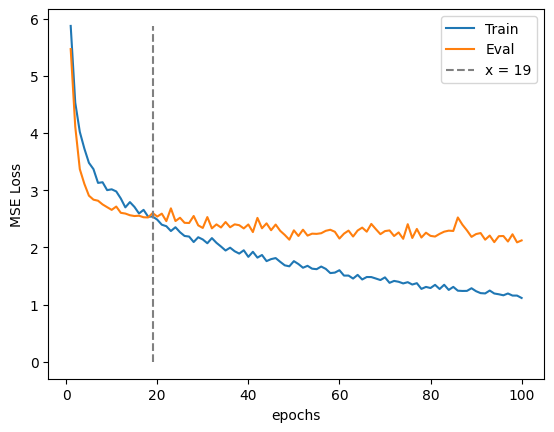

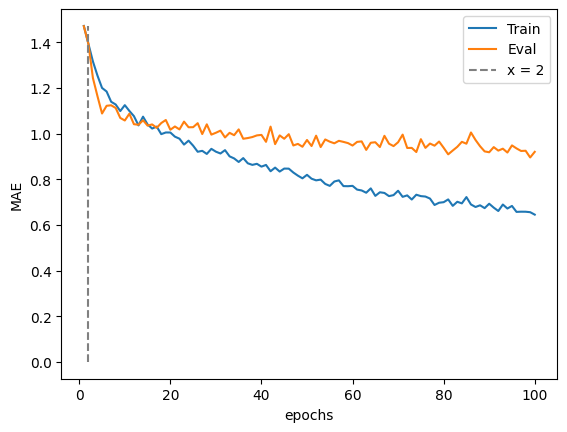

Epoch 001: | Train Loss: 6.03710 | Val Loss: 4.87866 | Train Acc: 1.499| Val Acc: 1.360
Epoch 002: | Train Loss: 4.77973 | Val Loss: 3.88577 | Train Acc: 1.437| Val Acc: 1.303
Epoch 003: | Train Loss: 4.09371 | Val Loss: 3.31232 | Train Acc: 1.335| Val Acc: 1.203
Epoch 004: | Train Loss: 3.78042 | Val Loss: 3.28572 | Train Acc: 1.264| Val Acc: 1.189
Epoch 005: | Train Loss: 3.62205 | Val Loss: 3.17288 | Train Acc: 1.233| Val Acc: 1.153
Epoch 006: | Train Loss: 3.31236 | Val Loss: 3.07071 | Train Acc: 1.178| Val Acc: 1.134
Epoch 007: | Train Loss: 3.30244 | Val Loss: 3.01537 | Train Acc: 1.173| Val Acc: 1.140
Epoch 008: | Train Loss: 3.14734 | Val Loss: 2.92676 | Train Acc: 1.127| Val Acc: 1.117
Epoch 009: | Train Loss: 3.12668 | Val Loss: 2.91485 | Train Acc: 1.126| Val Acc: 1.150
Epoch 010: | Train Loss: 2.97236 | Val Loss: 2.86084 | Train Acc: 1.096| Val Acc: 1.103
Epoch 011: | Train Loss: 2.89716 | Val Loss: 2.86377 | Train Acc: 1.074| Val Acc: 1.094
Epoch 012: | Train Loss: 2.75654

Epoch 095: | Train Loss: 1.13633 | Val Loss: 2.37946 | Train Acc: 0.667| Val Acc: 0.993
Epoch 096: | Train Loss: 1.13806 | Val Loss: 2.49531 | Train Acc: 0.667| Val Acc: 1.000
Epoch 097: | Train Loss: 1.12596 | Val Loss: 2.51092 | Train Acc: 0.652| Val Acc: 1.002
Epoch 098: | Train Loss: 1.06004 | Val Loss: 2.46815 | Train Acc: 0.630| Val Acc: 1.002
Epoch 099: | Train Loss: 1.10252 | Val Loss: 2.59788 | Train Acc: 0.660| Val Acc: 0.989
Epoch 100: | Train Loss: 1.10452 | Val Loss: 2.61672 | Train Acc: 0.649| Val Acc: 1.015


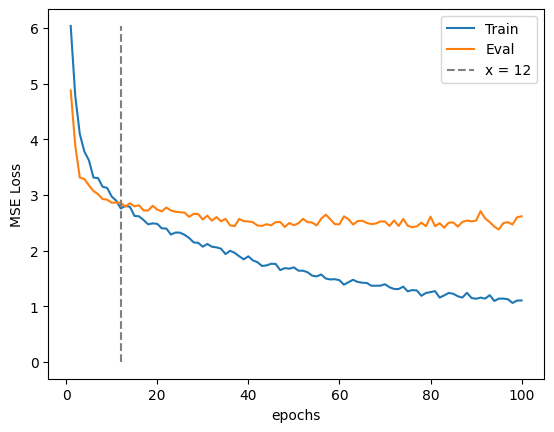

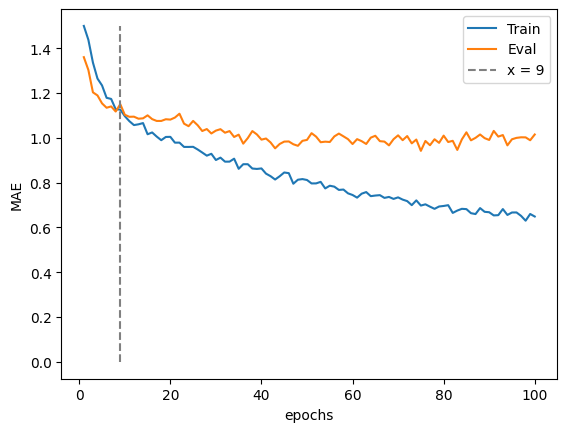

Epoch 001: | Train Loss: 6.08059 | Val Loss: 4.85950 | Train Acc: 1.504| Val Acc: 1.345
Epoch 002: | Train Loss: 4.67009 | Val Loss: 3.69475 | Train Acc: 1.399| Val Acc: 1.238
Epoch 003: | Train Loss: 4.00020 | Val Loss: 3.10233 | Train Acc: 1.300| Val Acc: 1.144
Epoch 004: | Train Loss: 3.71429 | Val Loss: 2.94170 | Train Acc: 1.232| Val Acc: 1.119
Epoch 005: | Train Loss: 3.56247 | Val Loss: 2.78259 | Train Acc: 1.209| Val Acc: 1.055
Epoch 006: | Train Loss: 3.38336 | Val Loss: 2.73570 | Train Acc: 1.178| Val Acc: 1.064
Epoch 007: | Train Loss: 3.17749 | Val Loss: 2.62659 | Train Acc: 1.128| Val Acc: 1.044
Epoch 008: | Train Loss: 3.12460 | Val Loss: 2.58029 | Train Acc: 1.133| Val Acc: 1.019
Epoch 009: | Train Loss: 3.05199 | Val Loss: 2.52614 | Train Acc: 1.114| Val Acc: 1.003
Epoch 010: | Train Loss: 3.00316 | Val Loss: 2.52719 | Train Acc: 1.097| Val Acc: 1.015
Epoch 011: | Train Loss: 2.91488 | Val Loss: 2.53788 | Train Acc: 1.073| Val Acc: 1.001
Epoch 012: | Train Loss: 2.82168

Epoch 095: | Train Loss: 1.22027 | Val Loss: 2.18859 | Train Acc: 0.677| Val Acc: 0.900
Epoch 096: | Train Loss: 1.18649 | Val Loss: 2.41916 | Train Acc: 0.679| Val Acc: 0.960
Epoch 097: | Train Loss: 1.20076 | Val Loss: 2.27278 | Train Acc: 0.677| Val Acc: 0.923
Epoch 098: | Train Loss: 1.20687 | Val Loss: 2.45554 | Train Acc: 0.676| Val Acc: 0.945
Epoch 099: | Train Loss: 1.14692 | Val Loss: 2.32094 | Train Acc: 0.652| Val Acc: 0.907
Epoch 100: | Train Loss: 1.18767 | Val Loss: 2.22711 | Train Acc: 0.677| Val Acc: 0.942


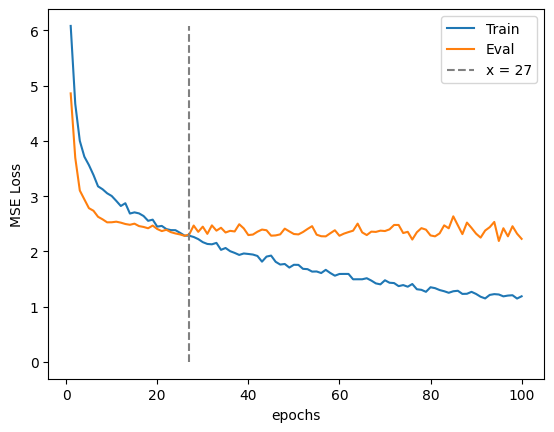

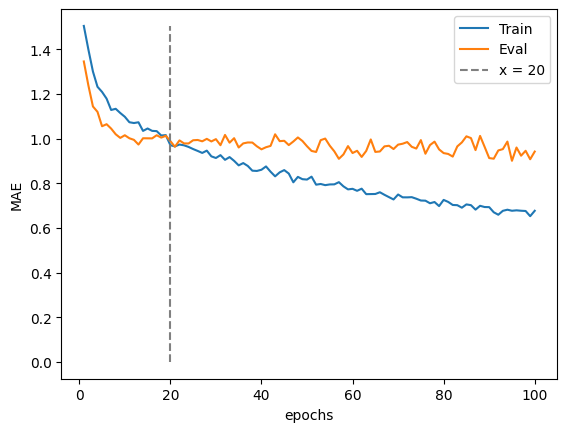

Epoch 001: | Train Loss: 5.81536 | Val Loss: 4.40459 | Train Acc: 1.468| Val Acc: 1.240
Epoch 002: | Train Loss: 4.57988 | Val Loss: 3.59096 | Train Acc: 1.387| Val Acc: 1.241
Epoch 003: | Train Loss: 3.95542 | Val Loss: 3.09724 | Train Acc: 1.297| Val Acc: 1.141
Epoch 004: | Train Loss: 3.71645 | Val Loss: 2.87214 | Train Acc: 1.241| Val Acc: 1.089
Epoch 005: | Train Loss: 3.51505 | Val Loss: 2.72550 | Train Acc: 1.203| Val Acc: 1.041
Epoch 006: | Train Loss: 3.30636 | Val Loss: 2.58345 | Train Acc: 1.162| Val Acc: 0.994
Epoch 007: | Train Loss: 3.24628 | Val Loss: 2.52756 | Train Acc: 1.156| Val Acc: 0.998
Epoch 008: | Train Loss: 3.07163 | Val Loss: 2.45554 | Train Acc: 1.119| Val Acc: 0.993
Epoch 009: | Train Loss: 3.07991 | Val Loss: 2.42526 | Train Acc: 1.125| Val Acc: 0.991
Epoch 010: | Train Loss: 2.99801 | Val Loss: 2.38640 | Train Acc: 1.116| Val Acc: 0.967
Epoch 011: | Train Loss: 2.91010 | Val Loss: 2.34982 | Train Acc: 1.091| Val Acc: 0.959
Epoch 012: | Train Loss: 2.80419

Epoch 095: | Train Loss: 1.24724 | Val Loss: 1.86294 | Train Acc: 0.695| Val Acc: 0.836
Epoch 096: | Train Loss: 1.24342 | Val Loss: 1.90483 | Train Acc: 0.688| Val Acc: 0.856
Epoch 097: | Train Loss: 1.24171 | Val Loss: 2.00495 | Train Acc: 0.683| Val Acc: 0.867
Epoch 098: | Train Loss: 1.20924 | Val Loss: 1.94914 | Train Acc: 0.666| Val Acc: 0.853
Epoch 099: | Train Loss: 1.20991 | Val Loss: 1.99749 | Train Acc: 0.686| Val Acc: 0.862
Epoch 100: | Train Loss: 1.20644 | Val Loss: 1.92531 | Train Acc: 0.670| Val Acc: 0.853


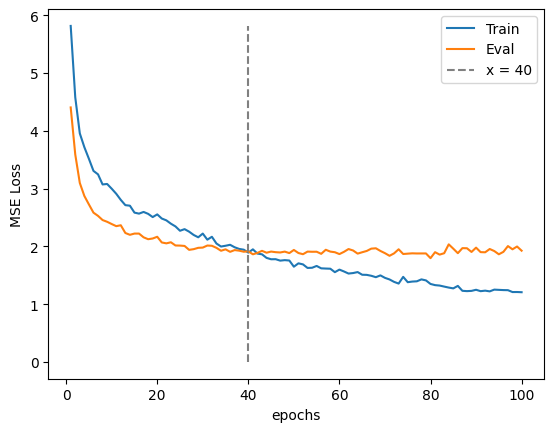

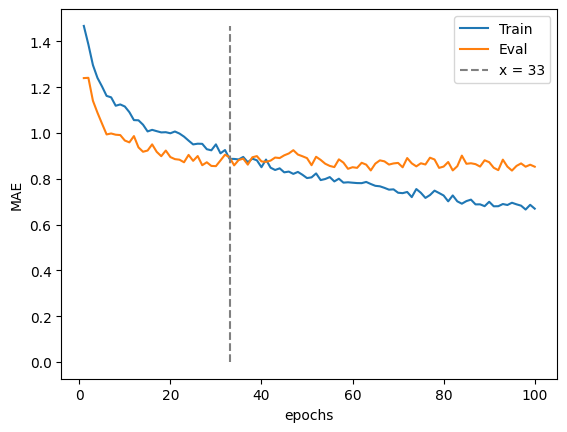

Epoch 001: | Train Loss: 5.97003 | Val Loss: 5.42446 | Train Acc: 1.484| Val Acc: 1.423
Epoch 002: | Train Loss: 4.62610 | Val Loss: 3.97983 | Train Acc: 1.384| Val Acc: 1.291
Epoch 003: | Train Loss: 3.94532 | Val Loss: 3.42867 | Train Acc: 1.279| Val Acc: 1.222
Epoch 004: | Train Loss: 3.75730 | Val Loss: 3.34192 | Train Acc: 1.238| Val Acc: 1.180
Epoch 005: | Train Loss: 3.59175 | Val Loss: 3.29738 | Train Acc: 1.215| Val Acc: 1.162
Epoch 006: | Train Loss: 3.34178 | Val Loss: 3.12864 | Train Acc: 1.180| Val Acc: 1.105
Epoch 007: | Train Loss: 3.11520 | Val Loss: 3.01930 | Train Acc: 1.118| Val Acc: 1.100
Epoch 008: | Train Loss: 3.07305 | Val Loss: 3.05233 | Train Acc: 1.102| Val Acc: 1.089
Epoch 009: | Train Loss: 2.97337 | Val Loss: 3.00010 | Train Acc: 1.097| Val Acc: 1.086
Epoch 010: | Train Loss: 2.91100 | Val Loss: 3.01303 | Train Acc: 1.077| Val Acc: 1.086
Epoch 011: | Train Loss: 2.85983 | Val Loss: 2.98671 | Train Acc: 1.073| Val Acc: 1.087
Epoch 012: | Train Loss: 2.80117

Epoch 095: | Train Loss: 1.12808 | Val Loss: 2.35565 | Train Acc: 0.653| Val Acc: 0.967
Epoch 096: | Train Loss: 1.17608 | Val Loss: 2.41210 | Train Acc: 0.664| Val Acc: 0.954
Epoch 097: | Train Loss: 1.13269 | Val Loss: 2.45283 | Train Acc: 0.651| Val Acc: 0.964
Epoch 098: | Train Loss: 1.16110 | Val Loss: 2.45763 | Train Acc: 0.661| Val Acc: 0.937
Epoch 099: | Train Loss: 1.17625 | Val Loss: 2.42971 | Train Acc: 0.661| Val Acc: 0.964
Epoch 100: | Train Loss: 1.13171 | Val Loss: 2.41803 | Train Acc: 0.639| Val Acc: 0.948


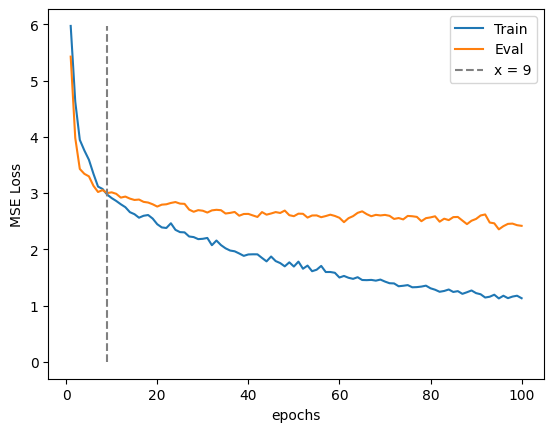

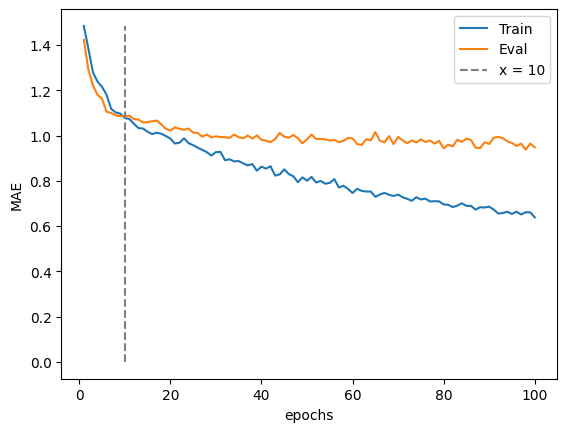

Epoch 001: | Train Loss: 5.99682 | Val Loss: 4.36636 | Train Acc: 1.492| Val Acc: 1.237
Epoch 002: | Train Loss: 4.64943 | Val Loss: 3.58600 | Train Acc: 1.402| Val Acc: 1.196
Epoch 003: | Train Loss: 3.97874 | Val Loss: 3.17277 | Train Acc: 1.313| Val Acc: 1.158
Epoch 004: | Train Loss: 3.80981 | Val Loss: 3.11208 | Train Acc: 1.247| Val Acc: 1.128
Epoch 005: | Train Loss: 3.51029 | Val Loss: 2.98747 | Train Acc: 1.211| Val Acc: 1.135
Epoch 006: | Train Loss: 3.33843 | Val Loss: 3.00278 | Train Acc: 1.156| Val Acc: 1.109
Epoch 007: | Train Loss: 3.31191 | Val Loss: 2.95742 | Train Acc: 1.165| Val Acc: 1.105
Epoch 008: | Train Loss: 3.19156 | Val Loss: 2.91770 | Train Acc: 1.138| Val Acc: 1.092
Epoch 009: | Train Loss: 2.98774 | Val Loss: 2.79596 | Train Acc: 1.105| Val Acc: 1.071
Epoch 010: | Train Loss: 3.01426 | Val Loss: 2.71456 | Train Acc: 1.111| Val Acc: 1.041
Epoch 011: | Train Loss: 2.91645 | Val Loss: 2.69380 | Train Acc: 1.077| Val Acc: 1.041
Epoch 012: | Train Loss: 2.93728

Epoch 095: | Train Loss: 1.19713 | Val Loss: 2.02211 | Train Acc: 0.681| Val Acc: 0.861
Epoch 096: | Train Loss: 1.19477 | Val Loss: 2.13626 | Train Acc: 0.676| Val Acc: 0.903
Epoch 097: | Train Loss: 1.16208 | Val Loss: 2.13016 | Train Acc: 0.647| Val Acc: 0.899
Epoch 098: | Train Loss: 1.17458 | Val Loss: 2.12301 | Train Acc: 0.652| Val Acc: 0.866
Epoch 099: | Train Loss: 1.12856 | Val Loss: 2.19269 | Train Acc: 0.641| Val Acc: 0.916
Epoch 100: | Train Loss: 1.10895 | Val Loss: 2.12066 | Train Acc: 0.639| Val Acc: 0.915


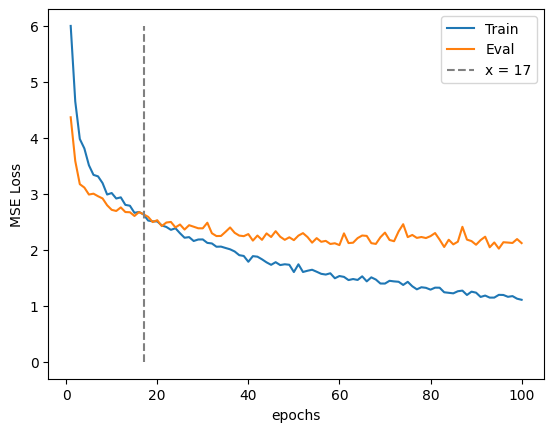

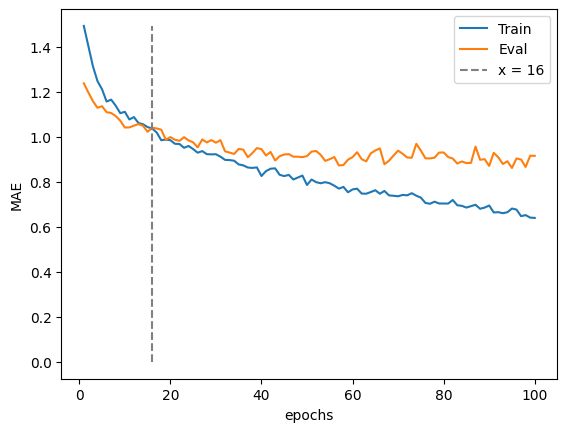

Epoch 001: | Train Loss: 6.01651 | Val Loss: 5.36792 | Train Acc: 1.487| Val Acc: 1.397
Epoch 002: | Train Loss: 4.62374 | Val Loss: 3.93672 | Train Acc: 1.397| Val Acc: 1.320
Epoch 003: | Train Loss: 3.91802 | Val Loss: 3.51112 | Train Acc: 1.310| Val Acc: 1.218
Epoch 004: | Train Loss: 3.60743 | Val Loss: 3.32718 | Train Acc: 1.235| Val Acc: 1.203
Epoch 005: | Train Loss: 3.46739 | Val Loss: 3.22555 | Train Acc: 1.198| Val Acc: 1.178
Epoch 006: | Train Loss: 3.30772 | Val Loss: 3.14639 | Train Acc: 1.183| Val Acc: 1.179
Epoch 007: | Train Loss: 3.13750 | Val Loss: 3.09785 | Train Acc: 1.139| Val Acc: 1.160
Epoch 008: | Train Loss: 3.07635 | Val Loss: 3.04359 | Train Acc: 1.113| Val Acc: 1.107
Epoch 009: | Train Loss: 2.88723 | Val Loss: 3.03280 | Train Acc: 1.085| Val Acc: 1.133
Epoch 010: | Train Loss: 2.89426 | Val Loss: 2.93860 | Train Acc: 1.082| Val Acc: 1.110
Epoch 011: | Train Loss: 2.83117 | Val Loss: 2.91154 | Train Acc: 1.075| Val Acc: 1.085
Epoch 012: | Train Loss: 2.78752

Epoch 095: | Train Loss: 1.08590 | Val Loss: 2.22046 | Train Acc: 0.647| Val Acc: 0.879
Epoch 096: | Train Loss: 1.09386 | Val Loss: 2.24494 | Train Acc: 0.645| Val Acc: 0.896
Epoch 097: | Train Loss: 1.06566 | Val Loss: 2.25347 | Train Acc: 0.641| Val Acc: 0.882
Epoch 098: | Train Loss: 1.11098 | Val Loss: 2.27720 | Train Acc: 0.660| Val Acc: 0.900
Epoch 099: | Train Loss: 1.05182 | Val Loss: 2.39249 | Train Acc: 0.640| Val Acc: 0.916
Epoch 100: | Train Loss: 1.06951 | Val Loss: 2.21557 | Train Acc: 0.645| Val Acc: 0.915


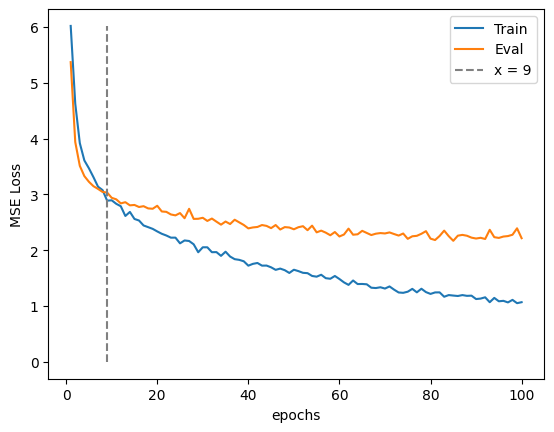

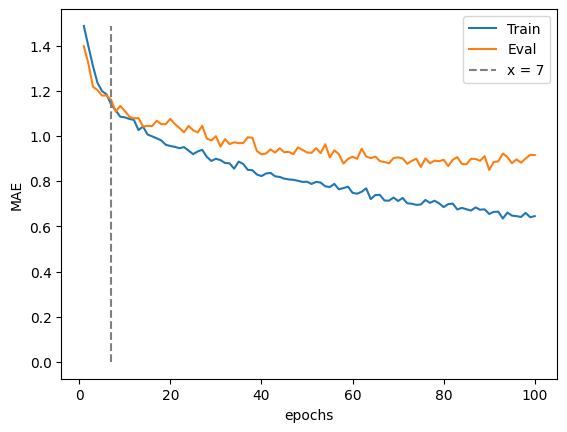

Epoch 001: | Train Loss: 5.85347 | Val Loss: 5.13603 | Train Acc: 1.469| Val Acc: 1.380
Epoch 002: | Train Loss: 4.46992 | Val Loss: 3.99101 | Train Acc: 1.358| Val Acc: 1.311
Epoch 003: | Train Loss: 3.99691 | Val Loss: 3.67485 | Train Acc: 1.295| Val Acc: 1.196
Epoch 004: | Train Loss: 3.61755 | Val Loss: 3.39477 | Train Acc: 1.237| Val Acc: 1.155
Epoch 005: | Train Loss: 3.41013 | Val Loss: 3.23530 | Train Acc: 1.179| Val Acc: 1.130
Epoch 006: | Train Loss: 3.28287 | Val Loss: 3.15719 | Train Acc: 1.147| Val Acc: 1.103
Epoch 007: | Train Loss: 3.28602 | Val Loss: 3.13471 | Train Acc: 1.163| Val Acc: 1.108
Epoch 008: | Train Loss: 3.02308 | Val Loss: 3.01000 | Train Acc: 1.112| Val Acc: 1.105
Epoch 009: | Train Loss: 2.97222 | Val Loss: 2.95008 | Train Acc: 1.113| Val Acc: 1.065
Epoch 010: | Train Loss: 2.86478 | Val Loss: 2.89989 | Train Acc: 1.087| Val Acc: 1.069
Epoch 011: | Train Loss: 2.86709 | Val Loss: 2.92451 | Train Acc: 1.075| Val Acc: 1.078
Epoch 012: | Train Loss: 2.81830

Epoch 095: | Train Loss: 1.16292 | Val Loss: 2.13216 | Train Acc: 0.674| Val Acc: 0.889
Epoch 096: | Train Loss: 1.12162 | Val Loss: 2.15296 | Train Acc: 0.650| Val Acc: 0.875
Epoch 097: | Train Loss: 1.18019 | Val Loss: 2.17290 | Train Acc: 0.671| Val Acc: 0.900
Epoch 098: | Train Loss: 1.12684 | Val Loss: 2.25165 | Train Acc: 0.654| Val Acc: 0.891
Epoch 099: | Train Loss: 1.08474 | Val Loss: 2.24279 | Train Acc: 0.639| Val Acc: 0.903
Epoch 100: | Train Loss: 1.13177 | Val Loss: 2.17170 | Train Acc: 0.648| Val Acc: 0.887


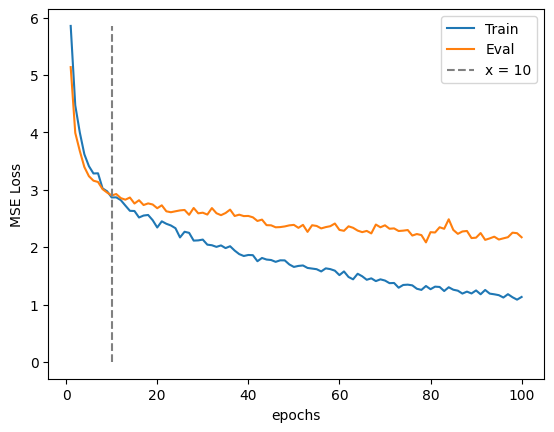

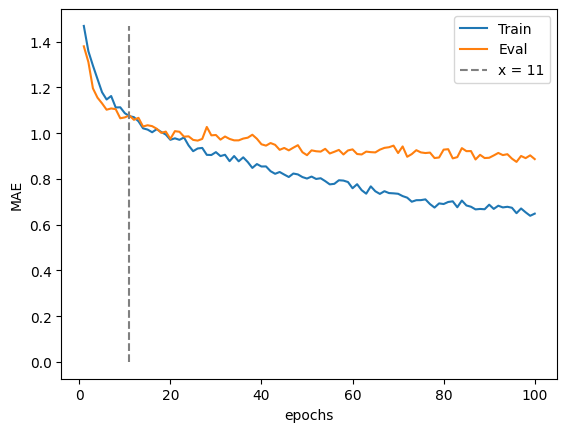

Epoch 001: | Train Loss: 6.28508 | Val Loss: 4.19973 | Train Acc: 1.512| Val Acc: 1.284
Epoch 002: | Train Loss: 5.00306 | Val Loss: 3.57099 | Train Acc: 1.464| Val Acc: 1.232
Epoch 003: | Train Loss: 4.20983 | Val Loss: 3.04671 | Train Acc: 1.356| Val Acc: 1.114
Epoch 004: | Train Loss: 3.84440 | Val Loss: 2.81731 | Train Acc: 1.282| Val Acc: 1.050
Epoch 005: | Train Loss: 3.88573 | Val Loss: 2.70986 | Train Acc: 1.269| Val Acc: 1.024
Epoch 006: | Train Loss: 3.57636 | Val Loss: 2.64551 | Train Acc: 1.226| Val Acc: 1.041
Epoch 007: | Train Loss: 3.55145 | Val Loss: 2.58729 | Train Acc: 1.224| Val Acc: 1.025
Epoch 008: | Train Loss: 3.46280 | Val Loss: 2.57091 | Train Acc: 1.207| Val Acc: 1.023
Epoch 009: | Train Loss: 3.32649 | Val Loss: 2.45114 | Train Acc: 1.193| Val Acc: 0.993
Epoch 010: | Train Loss: 3.13959 | Val Loss: 2.42105 | Train Acc: 1.155| Val Acc: 1.007
Epoch 011: | Train Loss: 3.20297 | Val Loss: 2.37225 | Train Acc: 1.148| Val Acc: 0.995
Epoch 012: | Train Loss: 2.99315

Epoch 095: | Train Loss: 1.24749 | Val Loss: 2.10878 | Train Acc: 0.696| Val Acc: 0.870
Epoch 096: | Train Loss: 1.24080 | Val Loss: 2.15849 | Train Acc: 0.688| Val Acc: 0.894
Epoch 097: | Train Loss: 1.17680 | Val Loss: 2.17155 | Train Acc: 0.678| Val Acc: 0.896
Epoch 098: | Train Loss: 1.22452 | Val Loss: 2.13321 | Train Acc: 0.697| Val Acc: 0.902
Epoch 099: | Train Loss: 1.20553 | Val Loss: 2.16349 | Train Acc: 0.681| Val Acc: 0.882
Epoch 100: | Train Loss: 1.18217 | Val Loss: 2.18680 | Train Acc: 0.677| Val Acc: 0.900


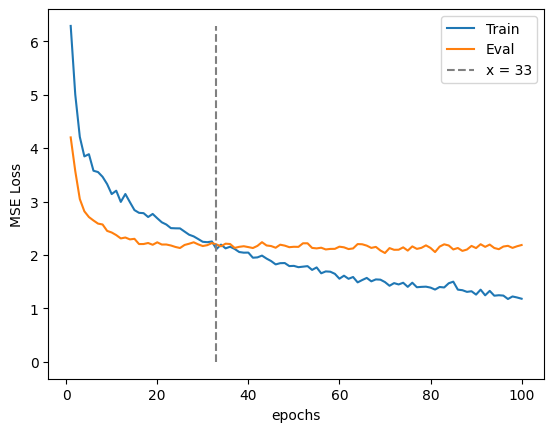

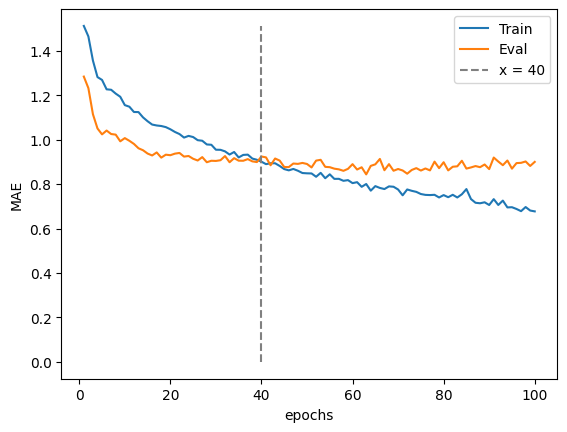

Epoch 001: | Train Loss: 6.15483 | Val Loss: 3.91510 | Train Acc: 1.506| Val Acc: 1.236
Epoch 002: | Train Loss: 4.68729 | Val Loss: 3.27489 | Train Acc: 1.421| Val Acc: 1.251
Epoch 003: | Train Loss: 4.00576 | Val Loss: 2.92046 | Train Acc: 1.304| Val Acc: 1.131
Epoch 004: | Train Loss: 3.65725 | Val Loss: 2.77428 | Train Acc: 1.243| Val Acc: 1.092
Epoch 005: | Train Loss: 3.49176 | Val Loss: 2.75771 | Train Acc: 1.203| Val Acc: 1.090
Epoch 006: | Train Loss: 3.27630 | Val Loss: 2.66666 | Train Acc: 1.170| Val Acc: 1.046
Epoch 007: | Train Loss: 3.17871 | Val Loss: 2.66543 | Train Acc: 1.138| Val Acc: 1.043
Epoch 008: | Train Loss: 3.09171 | Val Loss: 2.63856 | Train Acc: 1.133| Val Acc: 1.050
Epoch 009: | Train Loss: 3.02374 | Val Loss: 2.50439 | Train Acc: 1.112| Val Acc: 1.023
Epoch 010: | Train Loss: 2.85507 | Val Loss: 2.50770 | Train Acc: 1.072| Val Acc: 1.026
Epoch 011: | Train Loss: 2.83558 | Val Loss: 2.49144 | Train Acc: 1.074| Val Acc: 1.026
Epoch 012: | Train Loss: 2.76875

Epoch 095: | Train Loss: 1.20731 | Val Loss: 1.86996 | Train Acc: 0.674| Val Acc: 0.841
Epoch 096: | Train Loss: 1.16214 | Val Loss: 1.88692 | Train Acc: 0.664| Val Acc: 0.839
Epoch 097: | Train Loss: 1.17799 | Val Loss: 1.76025 | Train Acc: 0.657| Val Acc: 0.806
Epoch 098: | Train Loss: 1.18166 | Val Loss: 1.89517 | Train Acc: 0.671| Val Acc: 0.826
Epoch 099: | Train Loss: 1.12216 | Val Loss: 1.88823 | Train Acc: 0.654| Val Acc: 0.810
Epoch 100: | Train Loss: 1.14390 | Val Loss: 1.87063 | Train Acc: 0.660| Val Acc: 0.829


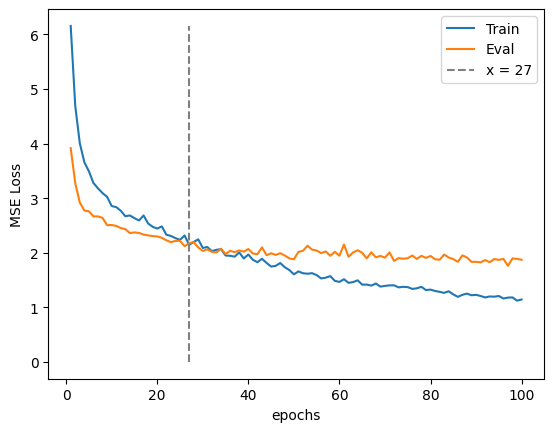

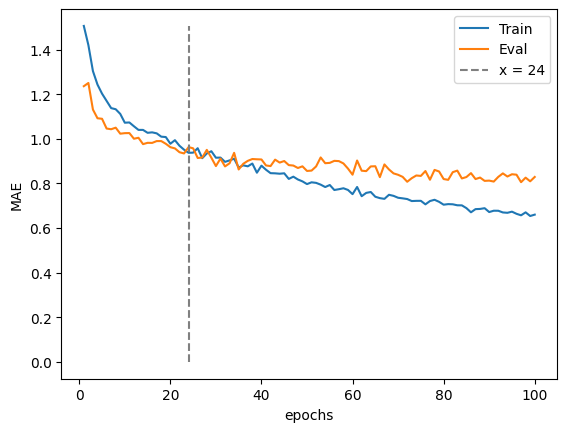

MAE on train set:  0.5019412740220466
min prediction: 0
max prediction: 9

MAE on test set:  0.8881474978050922
Error <= 3: 95.52 %
min prediction: 0
max prediction: 9


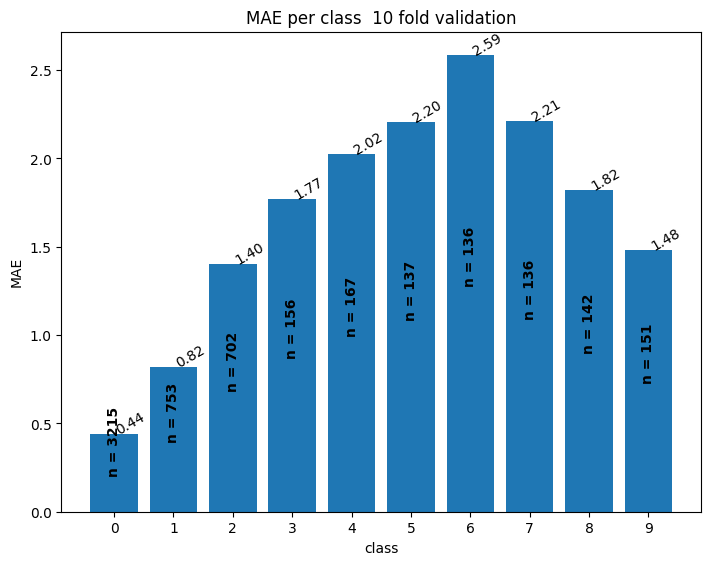

-----------|class error-MAE| difference-----------
mean: 0.5517680460586689
std: 0.3553412866116636
coefficient of variation (std/mean): 0.6440048298372837

----------normalized difference-------------
mean: 0.4994317962738373
std: 0.3216364889746617


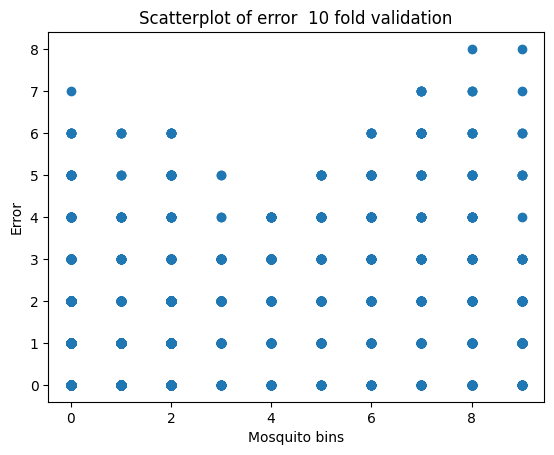

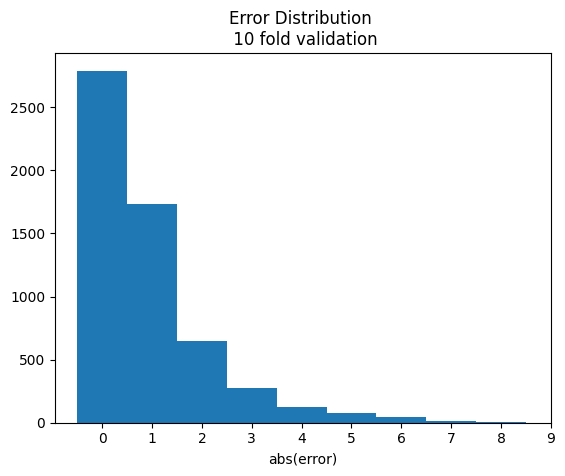

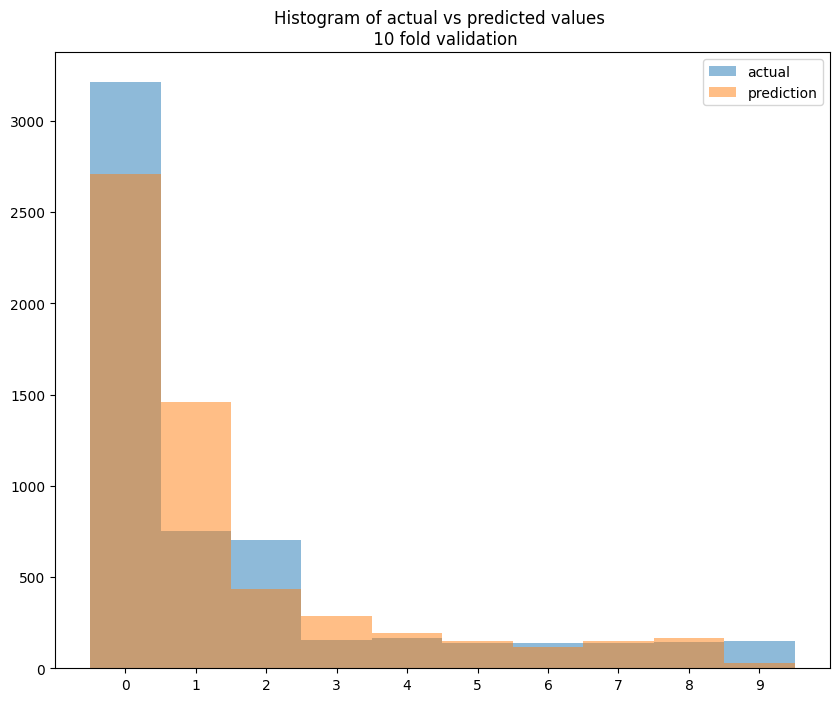

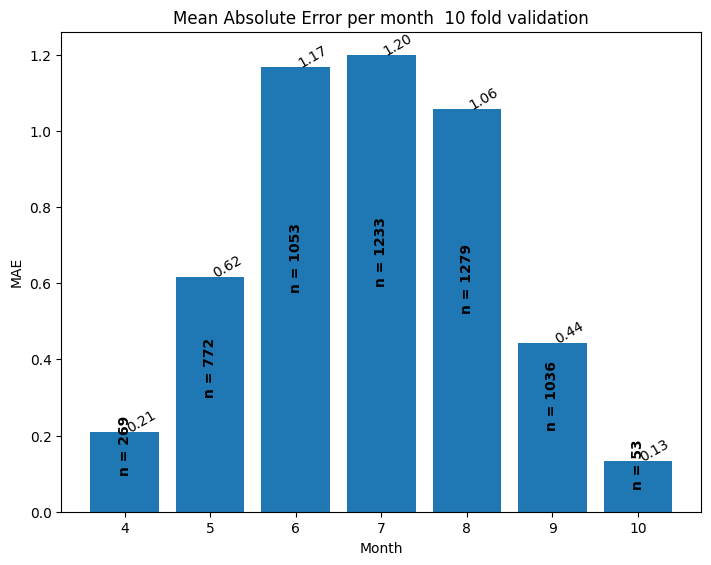

In [9]:
train_model_KFold(data, model, date_col='dt_placement', case='')

Epoch 001: | Train Loss: 6.25471 | Val Loss: 2.01233 | Train Acc: 1.528| Val Acc: 1.143
Epoch 002: | Train Loss: 4.59580 | Val Loss: 1.96655 | Train Acc: 1.419| Val Acc: 1.000
Epoch 003: | Train Loss: 4.03377 | Val Loss: 2.10039 | Train Acc: 1.318| Val Acc: 1.143
Epoch 004: | Train Loss: 3.59507 | Val Loss: 2.05554 | Train Acc: 1.244| Val Acc: 1.143
Epoch 005: | Train Loss: 3.36547 | Val Loss: 2.19230 | Train Acc: 1.189| Val Acc: 1.143
Epoch 006: | Train Loss: 3.20625 | Val Loss: 2.23288 | Train Acc: 1.158| Val Acc: 1.143
Epoch 007: | Train Loss: 3.18948 | Val Loss: 2.53653 | Train Acc: 1.156| Val Acc: 1.286
Epoch 008: | Train Loss: 3.01136 | Val Loss: 2.51662 | Train Acc: 1.118| Val Acc: 1.143
Epoch 009: | Train Loss: 2.92614 | Val Loss: 2.38369 | Train Acc: 1.102| Val Acc: 1.143
Epoch 010: | Train Loss: 2.84410 | Val Loss: 2.93408 | Train Acc: 1.081| Val Acc: 1.286
Epoch 011: | Train Loss: 2.78937 | Val Loss: 2.55993 | Train Acc: 1.079| Val Acc: 1.143
Epoch 012: | Train Loss: 2.75082

Epoch 095: | Train Loss: 1.07436 | Val Loss: 3.39316 | Train Acc: 0.645| Val Acc: 1.000
Epoch 096: | Train Loss: 1.10891 | Val Loss: 4.45872 | Train Acc: 0.663| Val Acc: 1.143
Epoch 097: | Train Loss: 1.13216 | Val Loss: 2.85165 | Train Acc: 0.661| Val Acc: 0.857
Epoch 098: | Train Loss: 1.07190 | Val Loss: 5.08317 | Train Acc: 0.658| Val Acc: 1.571
Epoch 099: | Train Loss: 1.04355 | Val Loss: 4.58368 | Train Acc: 0.638| Val Acc: 1.429
Epoch 100: | Train Loss: 1.04796 | Val Loss: 4.48443 | Train Acc: 0.643| Val Acc: 1.571


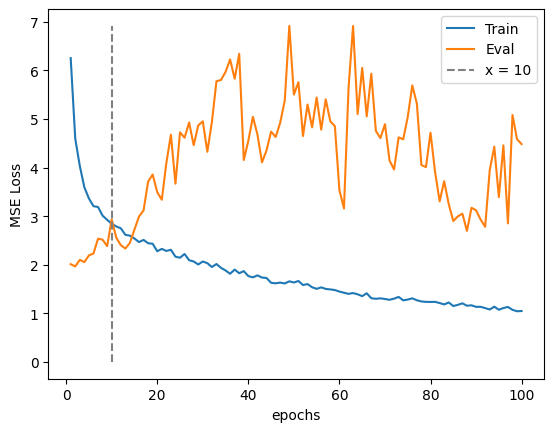

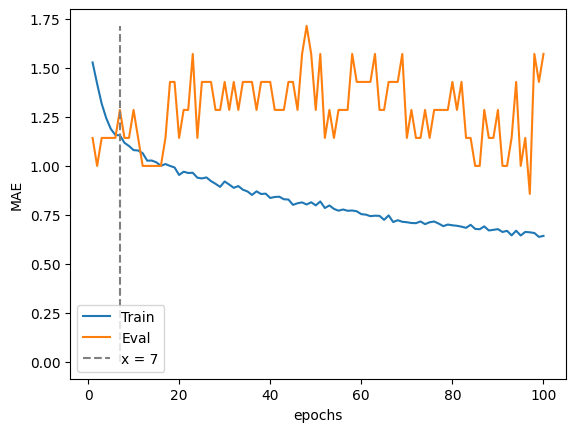

Epoch 001: | Train Loss: 1.27609 | Val Loss: 18.33237 | Train Acc: 0.695| Val Acc: 3.537
Epoch 002: | Train Loss: 1.24412 | Val Loss: 16.18124 | Train Acc: 0.693| Val Acc: 3.269
Epoch 003: | Train Loss: 1.24658 | Val Loss: 13.05852 | Train Acc: 0.689| Val Acc: 2.896
Epoch 004: | Train Loss: 1.21456 | Val Loss: 12.31613 | Train Acc: 0.691| Val Acc: 2.791
Epoch 005: | Train Loss: 1.20903 | Val Loss: 11.23360 | Train Acc: 0.681| Val Acc: 2.701
Epoch 006: | Train Loss: 1.15932 | Val Loss: 10.06252 | Train Acc: 0.671| Val Acc: 2.507
Epoch 007: | Train Loss: 1.13028 | Val Loss: 12.97332 | Train Acc: 0.657| Val Acc: 2.910
Epoch 008: | Train Loss: 1.16950 | Val Loss: 11.78525 | Train Acc: 0.677| Val Acc: 2.746
Epoch 009: | Train Loss: 1.17882 | Val Loss: 12.07263 | Train Acc: 0.670| Val Acc: 2.821
Epoch 010: | Train Loss: 1.16435 | Val Loss: 11.44998 | Train Acc: 0.664| Val Acc: 2.687
Epoch 011: | Train Loss: 1.10392 | Val Loss: 12.52728 | Train Acc: 0.664| Val Acc: 2.791
Epoch 012: | Train Lo

Epoch 094: | Train Loss: 0.75735 | Val Loss: 8.51504 | Train Acc: 0.535| Val Acc: 2.164
Epoch 095: | Train Loss: 0.73614 | Val Loss: 8.74213 | Train Acc: 0.538| Val Acc: 2.299
Epoch 096: | Train Loss: 0.74305 | Val Loss: 9.27323 | Train Acc: 0.527| Val Acc: 2.433
Epoch 097: | Train Loss: 0.74148 | Val Loss: 10.16452 | Train Acc: 0.522| Val Acc: 2.448
Epoch 098: | Train Loss: 0.75027 | Val Loss: 9.22504 | Train Acc: 0.537| Val Acc: 2.343
Epoch 099: | Train Loss: 0.77311 | Val Loss: 10.12311 | Train Acc: 0.523| Val Acc: 2.463
Epoch 100: | Train Loss: 0.75970 | Val Loss: 8.41686 | Train Acc: 0.526| Val Acc: 2.299


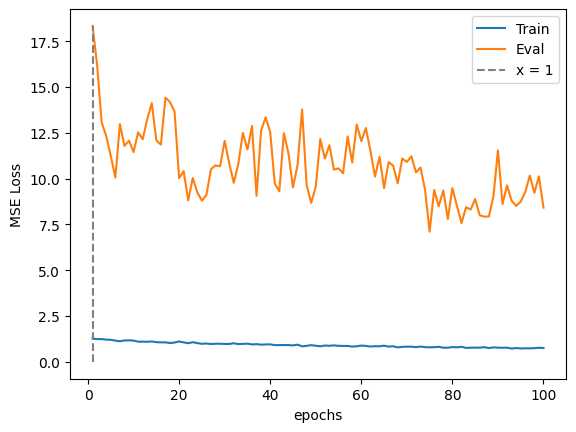

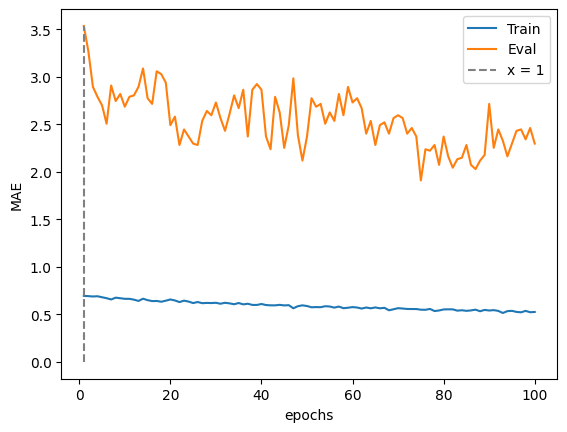

Epoch 001: | Train Loss: 1.09111 | Val Loss: 13.63342 | Train Acc: 0.631| Val Acc: 3.079
Epoch 002: | Train Loss: 1.01351 | Val Loss: 10.62413 | Train Acc: 0.617| Val Acc: 2.671
Epoch 003: | Train Loss: 1.00530 | Val Loss: 10.40563 | Train Acc: 0.609| Val Acc: 2.658
Epoch 004: | Train Loss: 0.95156 | Val Loss: 10.11850 | Train Acc: 0.605| Val Acc: 2.658
Epoch 005: | Train Loss: 0.96437 | Val Loss: 11.83700 | Train Acc: 0.587| Val Acc: 2.868
Epoch 006: | Train Loss: 0.92533 | Val Loss: 9.34114 | Train Acc: 0.590| Val Acc: 2.500
Epoch 007: | Train Loss: 0.90828 | Val Loss: 11.07852 | Train Acc: 0.586| Val Acc: 2.789
Epoch 008: | Train Loss: 0.95461 | Val Loss: 7.70714 | Train Acc: 0.594| Val Acc: 2.250
Epoch 009: | Train Loss: 0.93712 | Val Loss: 7.91614 | Train Acc: 0.588| Val Acc: 2.237
Epoch 010: | Train Loss: 0.87940 | Val Loss: 8.38890 | Train Acc: 0.560| Val Acc: 2.316
Epoch 011: | Train Loss: 0.90375 | Val Loss: 9.45778 | Train Acc: 0.576| Val Acc: 2.447
Epoch 012: | Train Loss: 0

Epoch 094: | Train Loss: 0.64384 | Val Loss: 7.83515 | Train Acc: 0.474| Val Acc: 2.145
Epoch 095: | Train Loss: 0.64923 | Val Loss: 7.62352 | Train Acc: 0.466| Val Acc: 2.026
Epoch 096: | Train Loss: 0.65226 | Val Loss: 9.34831 | Train Acc: 0.483| Val Acc: 2.224
Epoch 097: | Train Loss: 0.64186 | Val Loss: 8.03598 | Train Acc: 0.479| Val Acc: 2.211
Epoch 098: | Train Loss: 0.63390 | Val Loss: 8.18700 | Train Acc: 0.466| Val Acc: 2.132
Epoch 099: | Train Loss: 0.62469 | Val Loss: 8.93705 | Train Acc: 0.469| Val Acc: 2.289
Epoch 100: | Train Loss: 0.63374 | Val Loss: 7.06870 | Train Acc: 0.472| Val Acc: 1.868


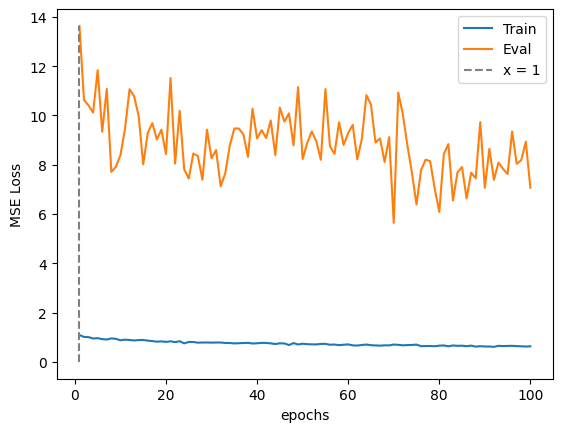

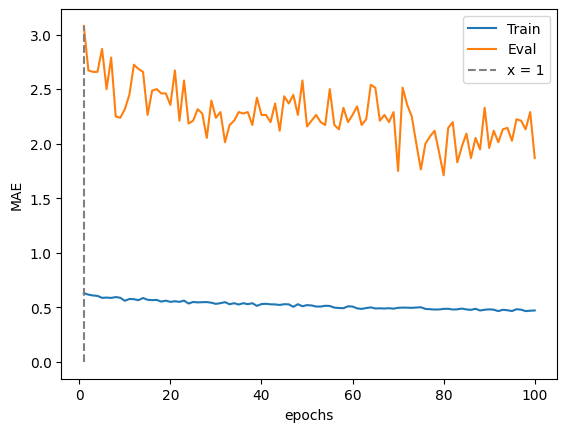

Epoch 001: | Train Loss: 0.93253 | Val Loss: 5.72606 | Train Acc: 0.564| Val Acc: 1.472
Epoch 002: | Train Loss: 0.89920 | Val Loss: 6.18740 | Train Acc: 0.567| Val Acc: 1.566
Epoch 003: | Train Loss: 0.88239 | Val Loss: 6.38569 | Train Acc: 0.561| Val Acc: 1.472
Epoch 004: | Train Loss: 0.81319 | Val Loss: 5.83955 | Train Acc: 0.547| Val Acc: 1.415
Epoch 005: | Train Loss: 0.83533 | Val Loss: 5.47923 | Train Acc: 0.551| Val Acc: 1.377
Epoch 006: | Train Loss: 0.82616 | Val Loss: 5.26108 | Train Acc: 0.542| Val Acc: 1.321
Epoch 007: | Train Loss: 0.75387 | Val Loss: 5.52437 | Train Acc: 0.532| Val Acc: 1.396
Epoch 008: | Train Loss: 0.81029 | Val Loss: 5.70428 | Train Acc: 0.545| Val Acc: 1.340
Epoch 009: | Train Loss: 0.79242 | Val Loss: 5.18230 | Train Acc: 0.536| Val Acc: 1.264
Epoch 010: | Train Loss: 0.77860 | Val Loss: 6.00294 | Train Acc: 0.534| Val Acc: 1.358
Epoch 011: | Train Loss: 0.77045 | Val Loss: 6.25724 | Train Acc: 0.532| Val Acc: 1.453
Epoch 012: | Train Loss: 0.78022

Epoch 095: | Train Loss: 0.55164 | Val Loss: 4.04983 | Train Acc: 0.427| Val Acc: 1.075
Epoch 096: | Train Loss: 0.55526 | Val Loss: 4.30508 | Train Acc: 0.428| Val Acc: 1.189
Epoch 097: | Train Loss: 0.58789 | Val Loss: 3.84043 | Train Acc: 0.448| Val Acc: 1.132
Epoch 098: | Train Loss: 0.57380 | Val Loss: 3.88203 | Train Acc: 0.436| Val Acc: 1.151
Epoch 099: | Train Loss: 0.56394 | Val Loss: 4.59106 | Train Acc: 0.432| Val Acc: 1.132
Epoch 100: | Train Loss: 0.55306 | Val Loss: 3.97698 | Train Acc: 0.432| Val Acc: 1.113


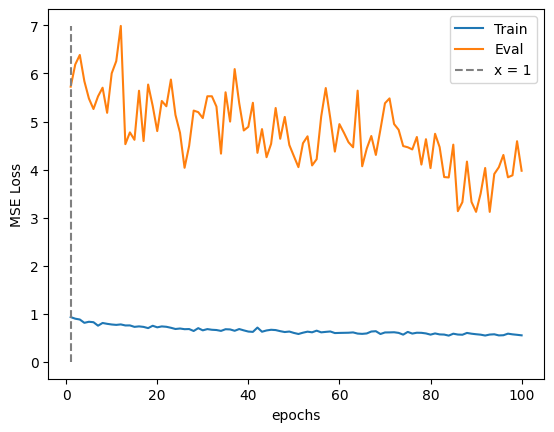

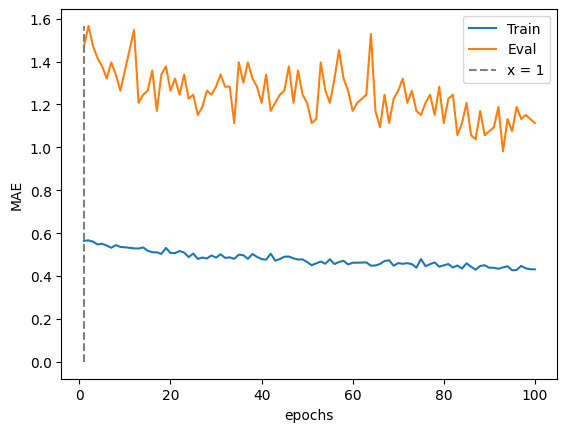

Epoch 001: | Train Loss: 0.82304 | Val Loss: 0.62748 | Train Acc: 0.523| Val Acc: 0.390
Epoch 002: | Train Loss: 0.79437 | Val Loss: 0.62862 | Train Acc: 0.518| Val Acc: 0.400
Epoch 003: | Train Loss: 0.73976 | Val Loss: 0.53703 | Train Acc: 0.509| Val Acc: 0.300
Epoch 004: | Train Loss: 0.72588 | Val Loss: 0.57585 | Train Acc: 0.498| Val Acc: 0.330
Epoch 005: | Train Loss: 0.73160 | Val Loss: 0.56609 | Train Acc: 0.508| Val Acc: 0.320
Epoch 006: | Train Loss: 0.70301 | Val Loss: 0.54493 | Train Acc: 0.493| Val Acc: 0.310
Epoch 007: | Train Loss: 0.67991 | Val Loss: 0.54158 | Train Acc: 0.490| Val Acc: 0.260
Epoch 008: | Train Loss: 0.69038 | Val Loss: 0.55144 | Train Acc: 0.489| Val Acc: 0.280
Epoch 009: | Train Loss: 0.69218 | Val Loss: 0.51878 | Train Acc: 0.482| Val Acc: 0.290
Epoch 010: | Train Loss: 0.68445 | Val Loss: 0.49408 | Train Acc: 0.492| Val Acc: 0.260
Epoch 011: | Train Loss: 0.67079 | Val Loss: 0.48548 | Train Acc: 0.484| Val Acc: 0.250
Epoch 012: | Train Loss: 0.64048

Epoch 095: | Train Loss: 0.51753 | Val Loss: 0.48996 | Train Acc: 0.395| Val Acc: 0.240
Epoch 096: | Train Loss: 0.50085 | Val Loss: 0.48897 | Train Acc: 0.406| Val Acc: 0.230
Epoch 097: | Train Loss: 0.49873 | Val Loss: 0.44620 | Train Acc: 0.395| Val Acc: 0.240
Epoch 098: | Train Loss: 0.47787 | Val Loss: 0.43814 | Train Acc: 0.391| Val Acc: 0.260
Epoch 099: | Train Loss: 0.49962 | Val Loss: 0.47192 | Train Acc: 0.394| Val Acc: 0.240
Epoch 100: | Train Loss: 0.50161 | Val Loss: 0.45564 | Train Acc: 0.393| Val Acc: 0.260


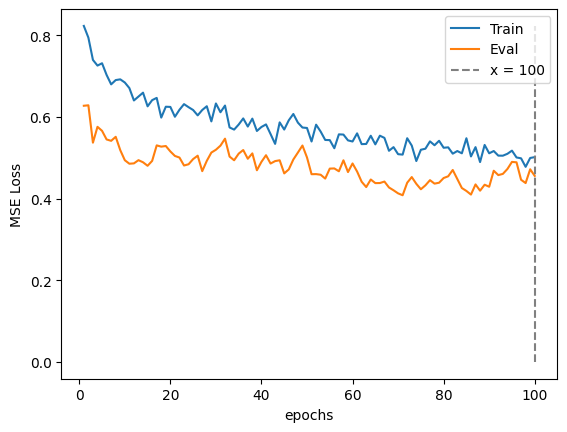

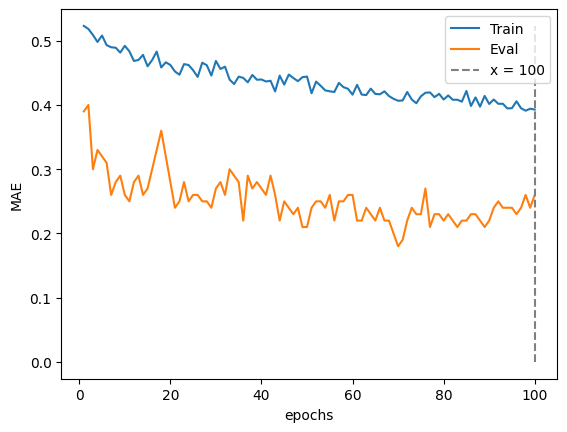

Epoch 001: | Train Loss: 0.76772 | Val Loss: 0.08538 | Train Acc: 0.485| Val Acc: 0.125
Epoch 002: | Train Loss: 0.75510 | Val Loss: 0.06171 | Train Acc: 0.478| Val Acc: 0.125
Epoch 003: | Train Loss: 0.71799 | Val Loss: 0.08275 | Train Acc: 0.482| Val Acc: 0.125
Epoch 004: | Train Loss: 0.67514 | Val Loss: 0.09969 | Train Acc: 0.471| Val Acc: 0.125
Epoch 005: | Train Loss: 0.68913 | Val Loss: 0.16359 | Train Acc: 0.470| Val Acc: 0.167
Epoch 006: | Train Loss: 0.69447 | Val Loss: 0.14709 | Train Acc: 0.475| Val Acc: 0.125
Epoch 007: | Train Loss: 0.63679 | Val Loss: 0.11675 | Train Acc: 0.452| Val Acc: 0.125
Epoch 008: | Train Loss: 0.63282 | Val Loss: 0.13798 | Train Acc: 0.445| Val Acc: 0.167
Epoch 009: | Train Loss: 0.65697 | Val Loss: 0.12052 | Train Acc: 0.460| Val Acc: 0.125
Epoch 010: | Train Loss: 0.64128 | Val Loss: 0.17597 | Train Acc: 0.458| Val Acc: 0.167
Epoch 011: | Train Loss: 0.63508 | Val Loss: 0.10759 | Train Acc: 0.449| Val Acc: 0.083
Epoch 012: | Train Loss: 0.60107

Epoch 095: | Train Loss: 0.50575 | Val Loss: 0.18655 | Train Acc: 0.385| Val Acc: 0.125
Epoch 096: | Train Loss: 0.48438 | Val Loss: 0.21394 | Train Acc: 0.382| Val Acc: 0.125
Epoch 097: | Train Loss: 0.46103 | Val Loss: 0.21931 | Train Acc: 0.367| Val Acc: 0.167
Epoch 098: | Train Loss: 0.46940 | Val Loss: 0.21240 | Train Acc: 0.375| Val Acc: 0.125
Epoch 099: | Train Loss: 0.47186 | Val Loss: 0.17359 | Train Acc: 0.380| Val Acc: 0.125
Epoch 100: | Train Loss: 0.45358 | Val Loss: 0.27404 | Train Acc: 0.366| Val Acc: 0.125


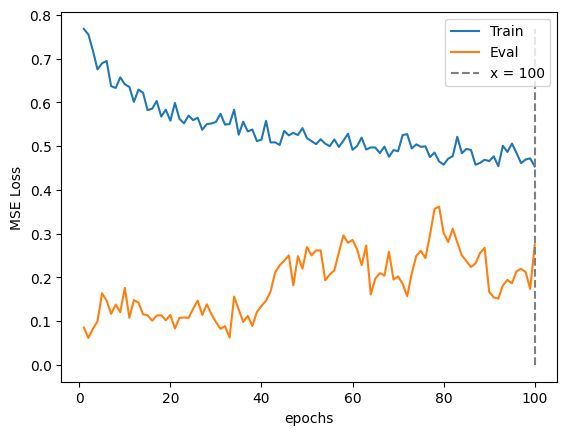

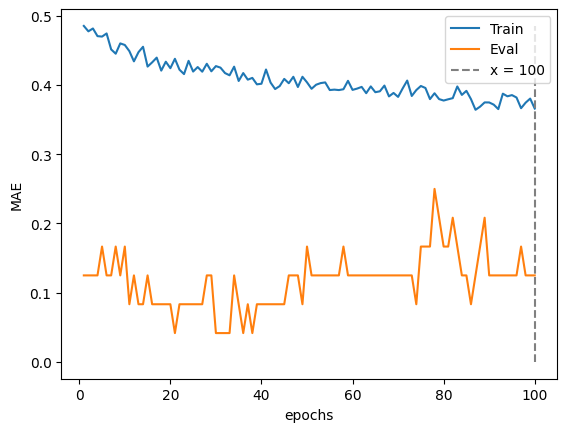

MAE on train set:  0.2920321748368493
min prediction: 0
max prediction: 9

MAE on test set:  1.2079510703363914
Error <= 3: 87.16 %
min prediction: 0
max prediction: 8


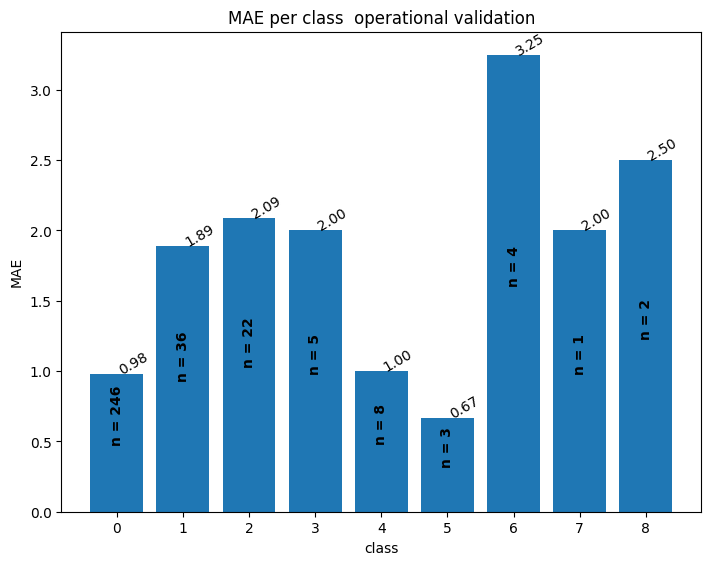

-----------|class error-MAE| difference-----------
mean: 0.8470956174208207
std: 0.583825804623327
coefficient of variation (std/mean): 0.689208859798992

----------normalized difference-------------
mean: 0.46205215495681135
std: 0.31845043888545105


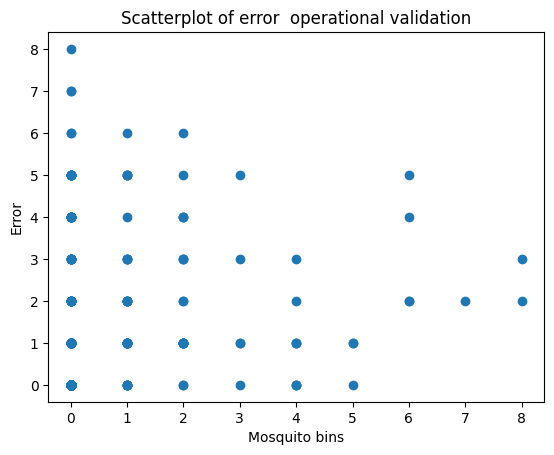

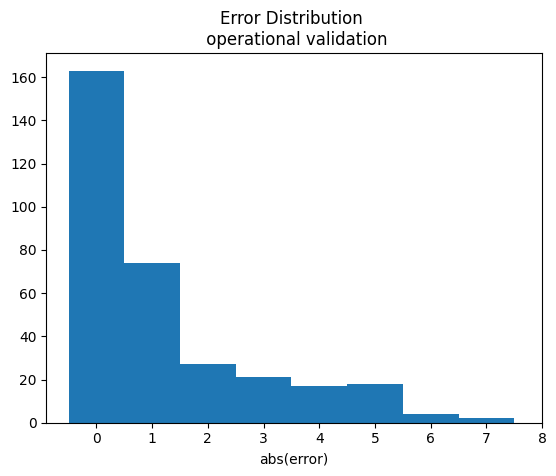

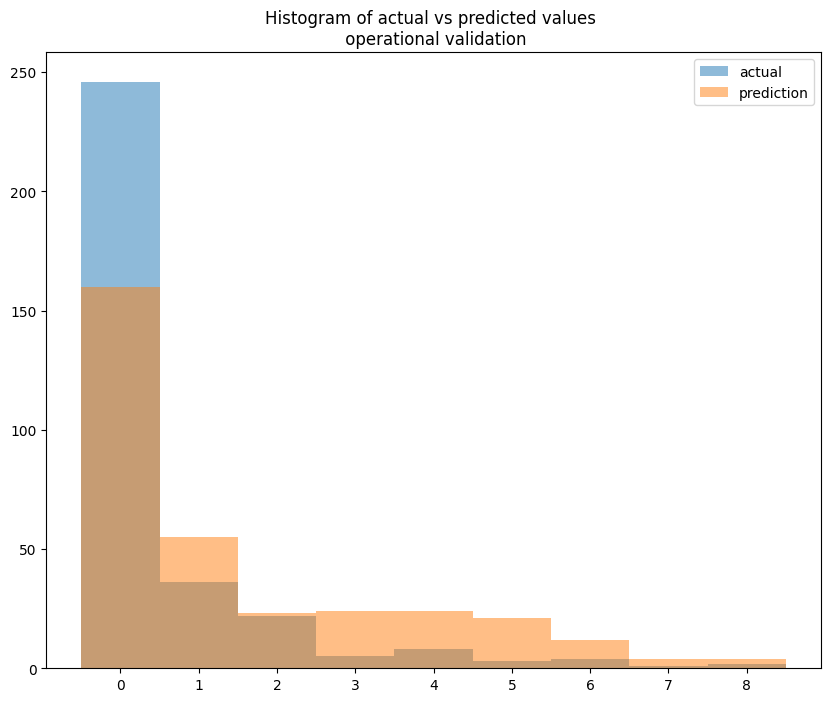

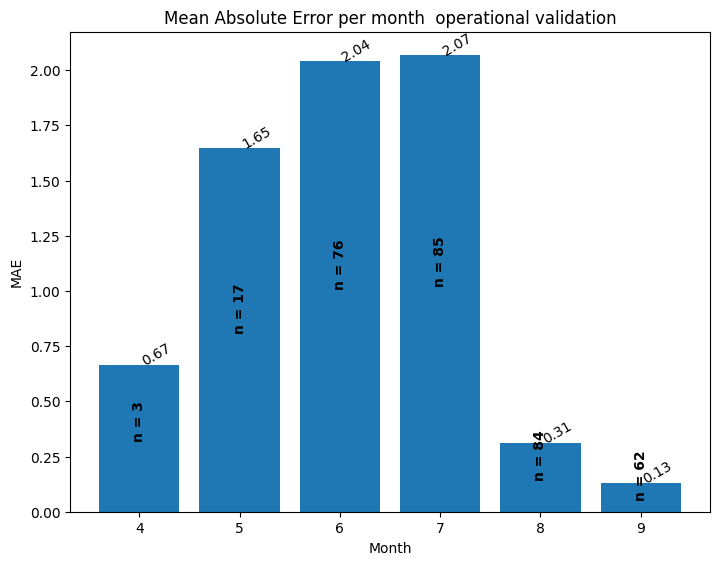

In [10]:
operational_validation(data, model, date='2022-01-01', filepath ='', date_col='dt_placement', case='', fi=False, export=False)